# Bernoulli model

This notebooks shows how to use the Bernoulli model to model a Bernoulli process.


We fix the probability of the Bernoulli variable to some probability, create a sample of measurements and then estimate the probability of the Bernoulli variable using the model.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import numpy as np
from  IPython.display import  Image

sns.set_style("darkgrid")
sns.set_context("paper")

In [2]:
REAL_PROB = 0.3

In [3]:
sample = np.random.choice([0, 1], size=1000, p=[1-REAL_PROB, REAL_PROB])

Below you can se how the model calculates the probability of the Bernoulli variable using sufficient statistics (counts of successes and failures).

In [4]:
a = [0]  # successes0
b = [0] # failures

probs = [] # calculated probabilities
vars = [] # calculated variances

for i in range(1, 1000):
    a.append(a[i-1] + sample[i])
    b.append(b[i-1] + 1)
    probs.append(a[i] / b[i])
    vars.append((a[-1]*b[-1])/((a[-1] + b[-1]) ** 2 * (a[-1] + b[-1] + 1)))

Below you can see, how the probability of the Bernoulli variable changes over time as we get more and more samples.

In [5]:
fig, ax = plt.subplots();
fig.set_size_inches(3, 5);
x = [0, 1]
y = [0.5, 0.5]

markerline, stemlines, baseline = ax.stem(x, np.cos(x), '-.');
ax.set_xticks([0, 1]);

def update(i):
    ax.cla();
    p = probs[i];
    markerline, stemlines, baseline = ax.stem([0, 1], [1-p, p], '-.');
    ax.set_ylim((0, 1));
    ax.set_xticks([0, 1]);
    ax.set_title(f'Bernoulli Distribution ({p:.2f})'.format(i));
    
anim = FuncAnimation(fig, update, frames=range(10, 110, 5), interval=500);
anim.save('./out/bern.gif', fps=4, writer='imagemagick');
plt.close()

In [6]:
Image(url='./out/bern.gif')

In [7]:
probs = np.array(probs)
var = 3*np.sqrt(np.array(vars))

In [8]:
c = ['green' if x else 'red' for x in sample]

Here is the whole process in one plot.

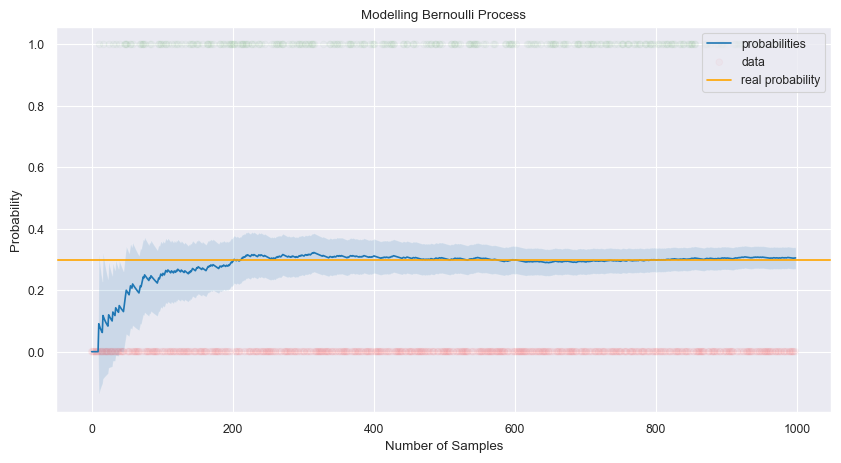

In [9]:
fig = plt.figure(figsize=(10, 5));
plt.plot( probs, label='probabilities');
plt.fill_between(np.arange(len(probs)), probs+var, probs-var, alpha=0.15);
plt.scatter(np.arange(len(sample)), sample, linestyle='None', marker='o', alpha=0.025, color=c, label='data');
plt.axhline(REAL_PROB, color='orange', linestyle='-', label='real probability', alpha=1);
plt.legend(loc='upper right');
plt.title('Modelling Bernoulli Process');
plt.xlabel('Number of Samples');
plt.ylabel('Probability');
plt.show()

## Using the traced module

In [10]:
from traced_v2.models.bernoulli import BernoulliModel

In [11]:
model = BernoulliModel("src", "dest")
for i, x in enumerate(sample):
    model.log(i, x)

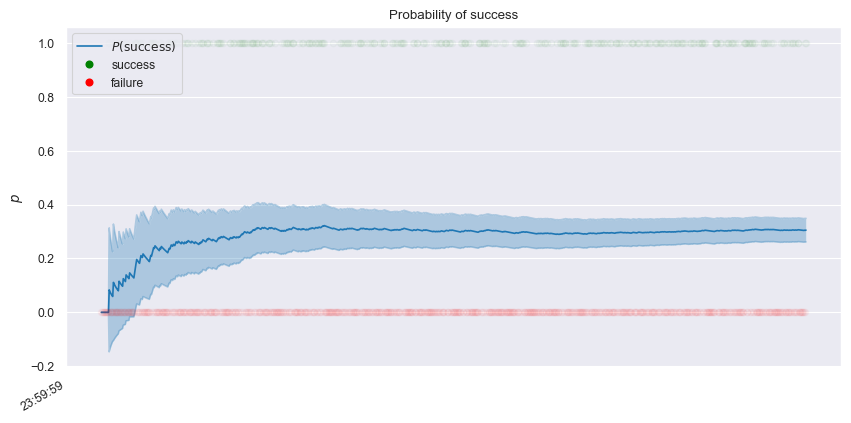

In [12]:
fig = plt.figure(figsize=(10, 5));
model.plot()